In [421]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor,RandomForestRegressor,AdaBoostRegressor

In [2]:
df = pd.read_csv('L1.csv')

In [3]:
df

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


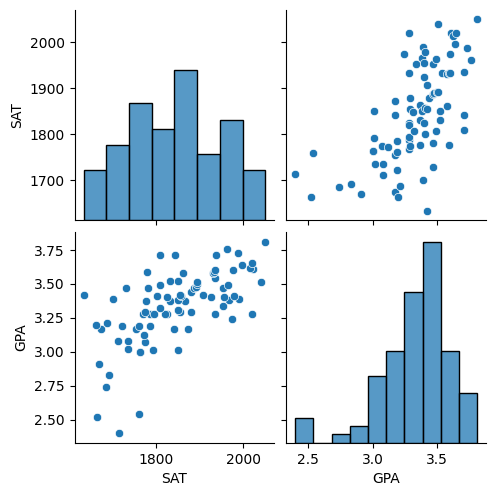

In [4]:
sns.pairplot(
    data = df
)

<Axes: xlabel='SAT', ylabel='GPA'>

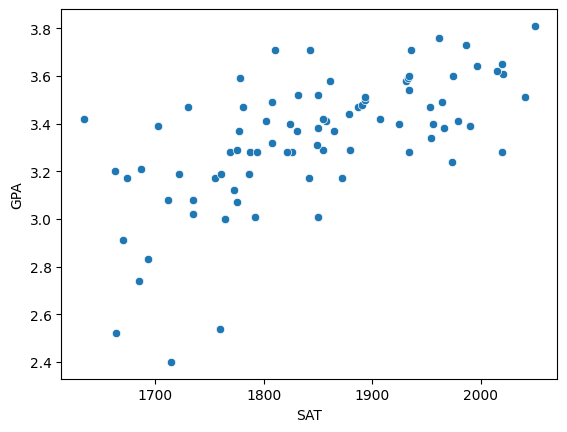

In [5]:
sns.scatterplot(
    data = df,
    x = 'SAT',
    y = 'GPA'
)

In [6]:
X = df.drop(columns=['GPA'])
y = df['GPA']

In [7]:
X_train , X_test , y_train , y_test = train_test_split(X , y, test_size = 0.2 , random_state = 42 )

In [8]:
dtr = DecisionTreeRegressor()

In [9]:
dtr.fit(X_train,y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max

In [10]:
y_pred_dtr = dtr.predict(X_test)

In [11]:
print(f'The r2score of the model is : {r2_score(y_test,y_pred_dtr)}')
print(f'The rmse of the model is : {root_mean_squared_error(y_test,y_pred_dtr)}')
print(f'The mae of the model is : {mean_absolute_error(y_test,y_pred_dtr)}')

The r2score of the model is : -0.20318530642952548
The rmse of the model is : 0.3450187074590768
The mae of the model is : 0.2745098039215686


In [12]:
cvs = cross_val_score(
    dtr,
    X,
    y,
    cv = 5
)

In [13]:
cvs.mean(),cvs.std()

(np.float64(-32.80048311274212), np.float64(24.762861769386856))

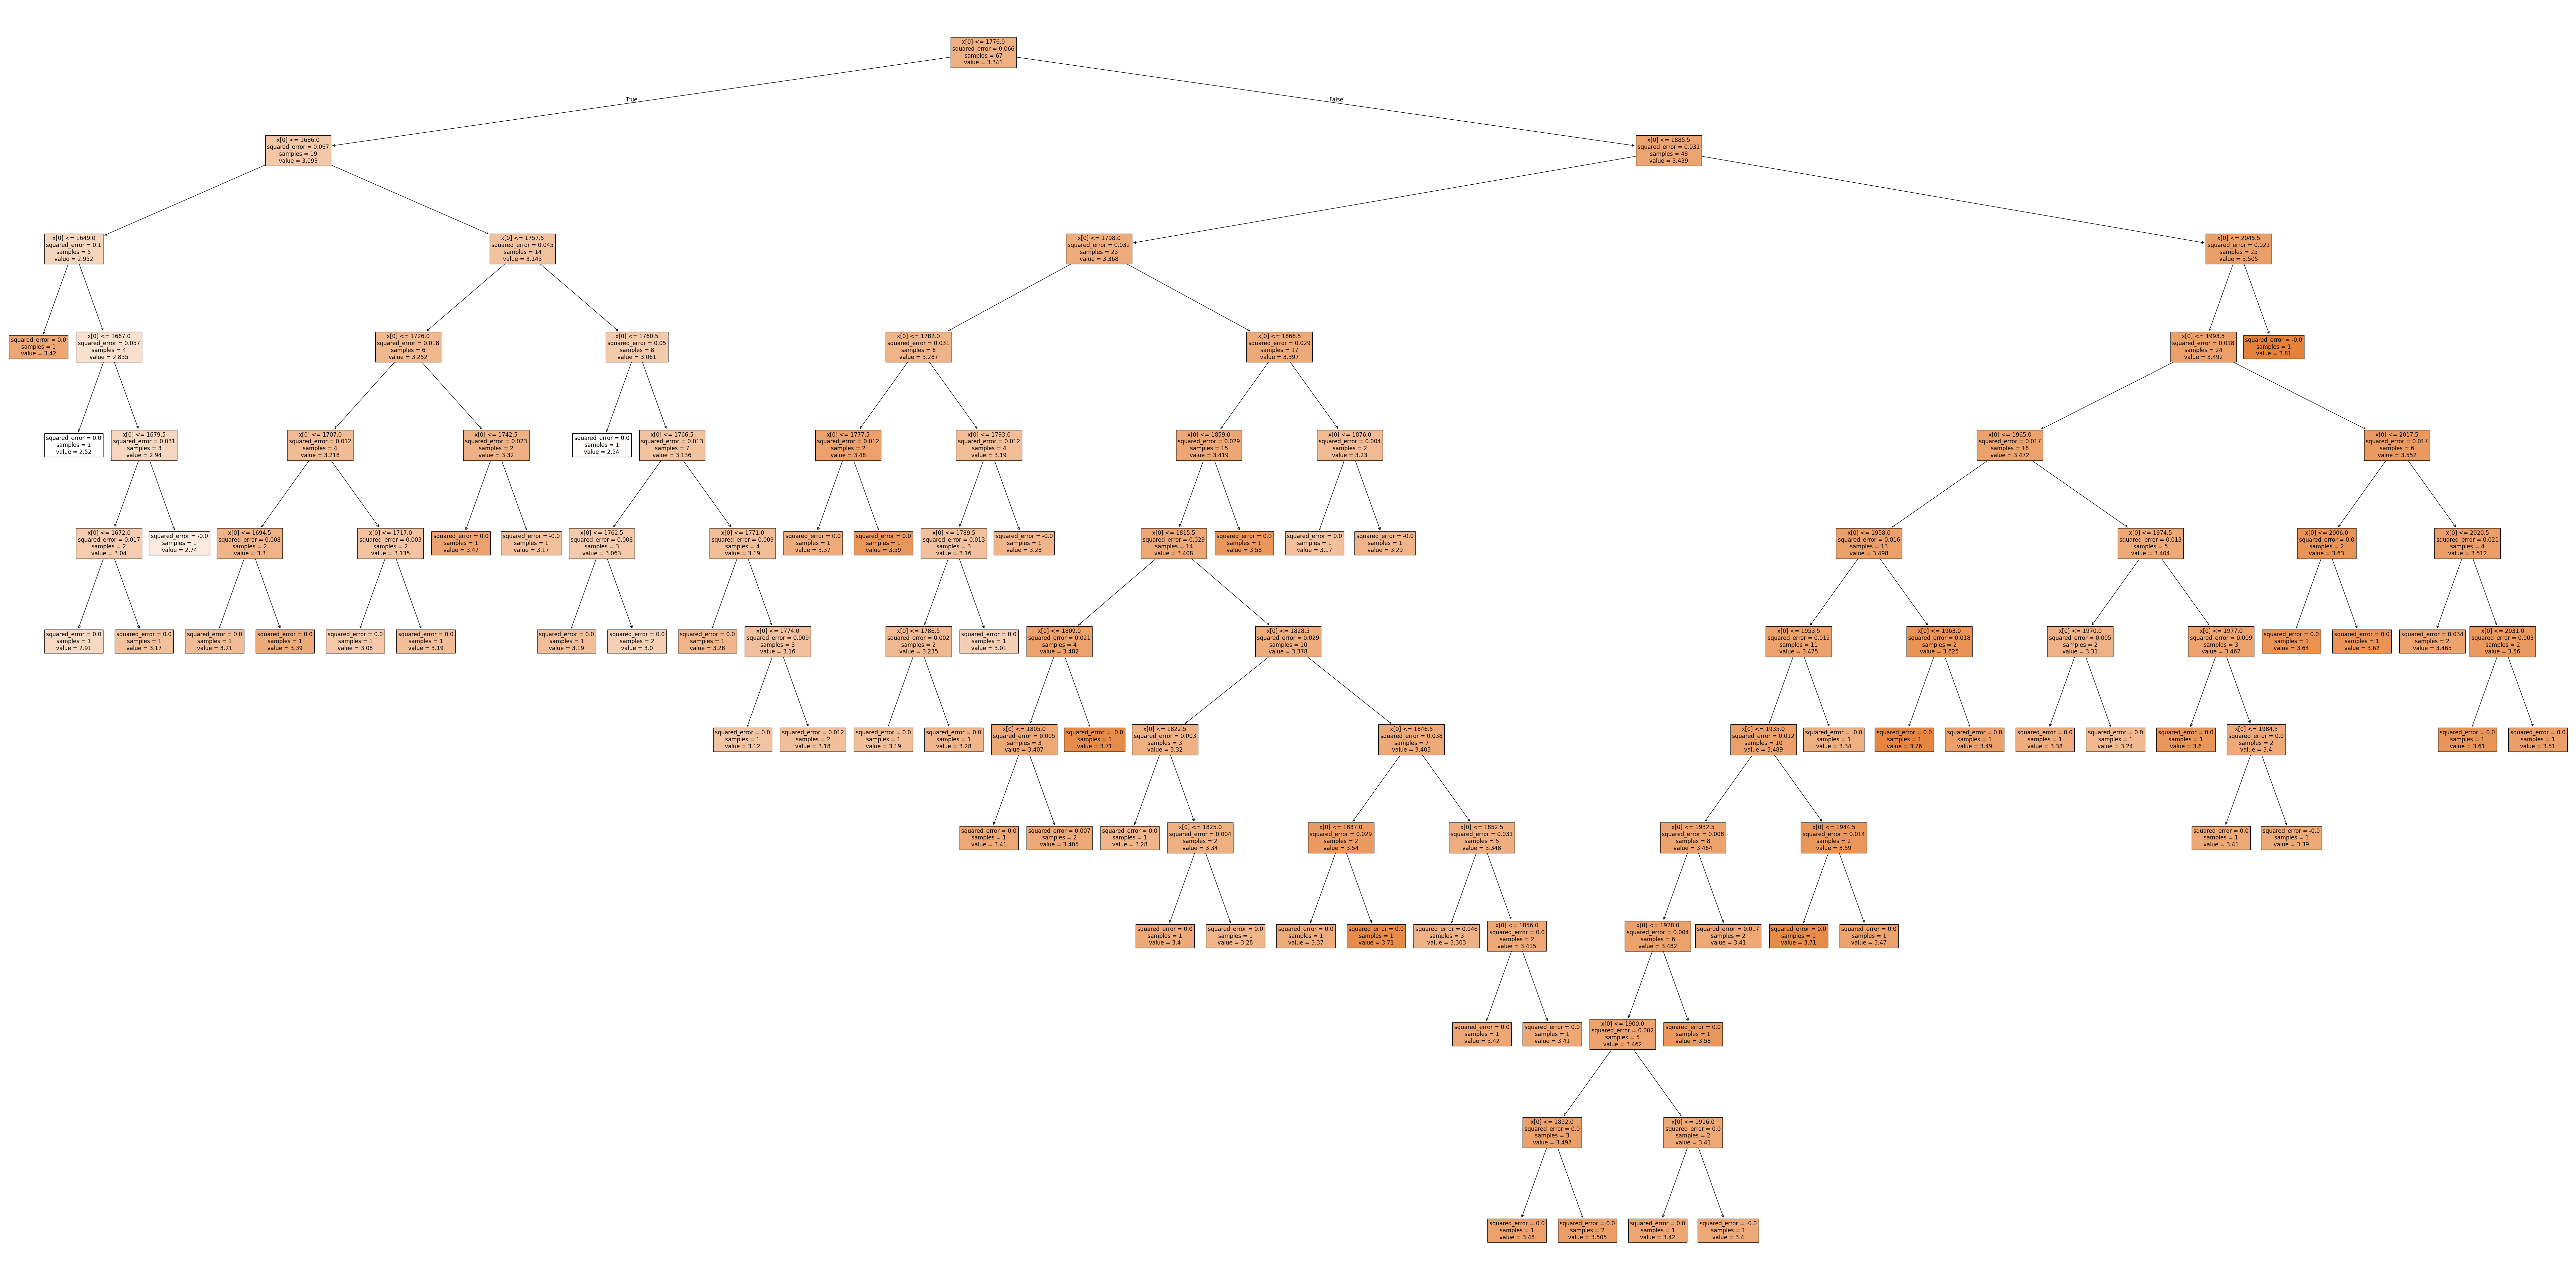

In [14]:
plt.figure(figsize=(100,50))
plot_tree(
    dtr,
    filled = True,
    fontsize = 12
)
plt.show()

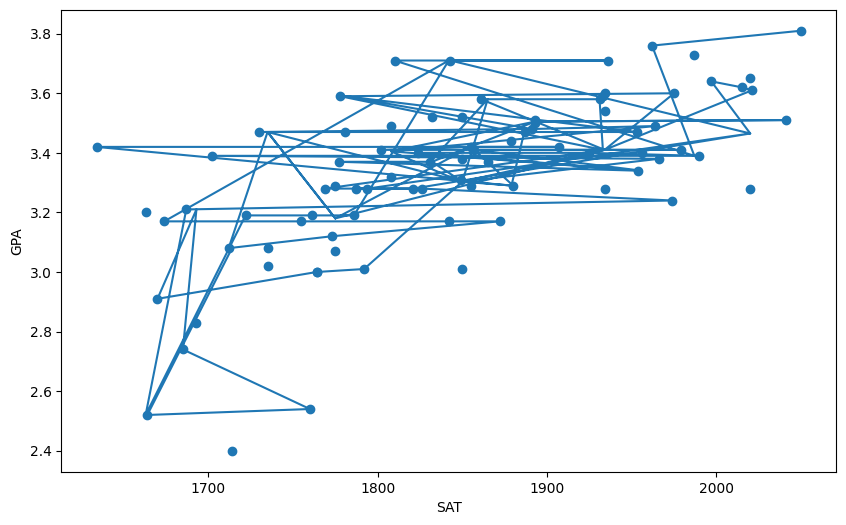

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(
    x = df['SAT'],
    y = df['GPA']
)
plt.plot(
    X,
    dtr.predict(X)
)
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.plot()
plt.show()

In [16]:
params = {
    'max_depth' : [1,2,5,10],
    'min_samples_split' : [2,3,5,10],
    'max_leaf_nodes' : [2,3,5,7],
    'ccp_alpha' : [ x*0.01 for x in range(1,11)],
    'min_samples_leaf' : [1,2,3,4,5]
}

In [17]:
grid = GridSearchCV(
    estimator = DecisionTreeRegressor(),
    param_grid = params,
    cv = 5,
    n_jobs=-1
)

In [18]:
grid.fit(X,y)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeRegressor()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'ccp_alpha': [0.01, 0.02, ...], 'max_depth': [1, 2, ...], 'max_leaf_nodes': [2, 3, ...], 'min_samples_leaf': [1, 2, ...], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter ca

In [19]:
grid.best_estimator_

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",1
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_le

In [20]:
grid.best_params_

{'ccp_alpha': 0.05,
 'max_depth': 1,
 'max_leaf_nodes': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [21]:
grid.best_score_

np.float64(-14.538470698482257)

In [22]:
dtr1 = grid.best_estimator_

In [23]:
dtr1.fit(X_train,y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",1
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_le

In [24]:
y_pred_dtr1 = dtr1.predict(X_test)

In [25]:
print(f'The r2score of the model is : {r2_score(y_test,y_pred_dtr1)}')
print(f'The rmse of the model is : {root_mean_squared_error(y_test,y_pred_dtr1)}')
print(f'The mae of the model is : {mean_absolute_error(y_test,y_pred_dtr1)}')

The r2score of the model is : -0.028819909674826505
The rmse of the model is : 0.3190406813414527
The mae of the model is : 0.23229148375768216


[Text(0.5, 0.5, 'squared_error = 0.066\nsamples = 67\nvalue = 3.341')]

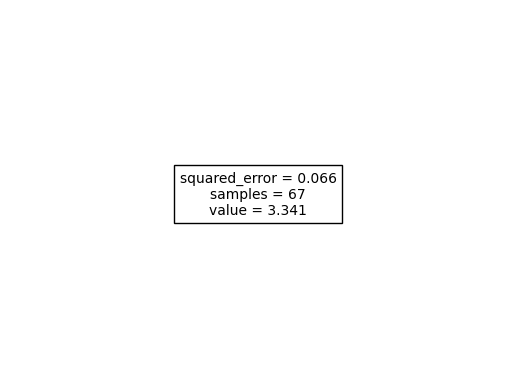

In [26]:
plot_tree(
    dtr1,
    filled = True,
    fontsize = 10
)

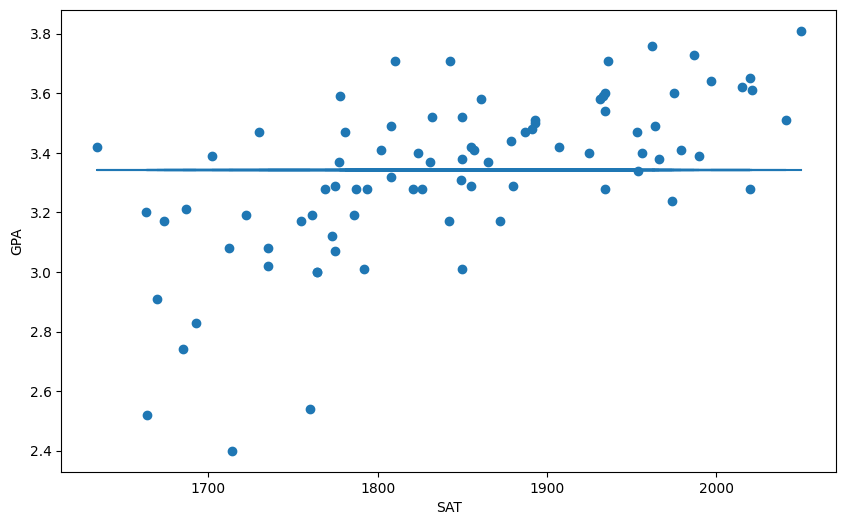

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(
    x = df['SAT'],
    y = df['GPA']
)
plt.plot(
    X,
    dtr1.predict(X)
)
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.plot()
plt.show()

In [47]:
lr = LinearRegression()

In [48]:
lr.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [49]:
lr.intercept_,lr.coef_

(np.float64(0.6258624722253536), array([0.0014687]))

In [50]:
y_pred_lr = lr.predict(X_test)

In [51]:
print(f'The r2_score of the model is : {r2_score(y_test,y_pred_lr)}')
print(f'The rmse of the model is : {root_mean_squared_error(y_test,y_pred_lr)}')
print(f'The mae of the model is : {mean_absolute_error(y_test,y_pred_lr)}')

The r2_score of the model is : 0.46949246374602127
The rmse of the model is : 0.22909845634036305
The mae of the model is : 0.16268831265429598


In [ ]:
cvs1 = cross_val_score(
    lr,
    X,
    y,
    cv = 5
)

In [53]:
cvs1.mean(),cvs1.std()

(np.float64(-15.601872314908857), np.float64(9.76651416502903))

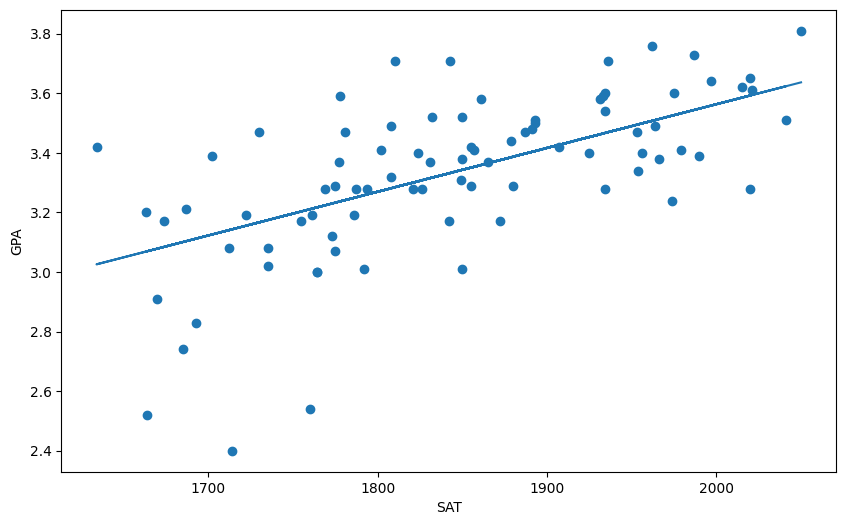

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(
    x = df['SAT'],
    y = df['GPA']
)
plt.plot(
    X,
    lr.predict(X)
)
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.plot()
plt.show()

In [100]:
poly = PolynomialFeatures(degree = 3)

In [101]:
poly.fit(X_train)

,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",3
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",True
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'


In [102]:
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

In [103]:
X_poly = poly.transform(X)

In [104]:
lr2 = LinearRegression()

In [105]:
lr2.fit(X_train_poly,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [106]:
y_pred_poly = lr2.predict(X_test_poly)

In [107]:
print(f'The r2_score of the model is : {r2_score(y_test,y_pred_poly)}')
print(f'The rmse of the model is : {root_mean_squared_error(y_test,y_pred_poly)}')
print(f'The mae of the model is : {mean_absolute_error(y_test,y_pred_poly)}')

The r2_score of the model is : 0.4971641921697859
The rmse of the model is : 0.22304345435855294
The mae of the model is : 0.15929533280839217


In [ ]:
cvs2 = cross_val_score(
    lr2,
    X,
    y,
    cv = 5
)

In [ ]:
cvs2.mean(),cvs2.std()

(np.float64(-15.601872314908857), np.float64(9.76651416502903))

In [ ]:
fig = px.scatter(
    df,
    x = df['SAT'],
    y = df['GPA'],
    trendline = 'lowess',
    trendline_options=dict(frac=0.5)
)
fig.show()

In [131]:
X_new = np.linspace(1600,2100,500).reshape(500,1)
X_new_poly = poly.transform(X_new)
y_new_poly = lr2.predict(X_new_poly)

c:\Users\hp\Desktop\ML\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



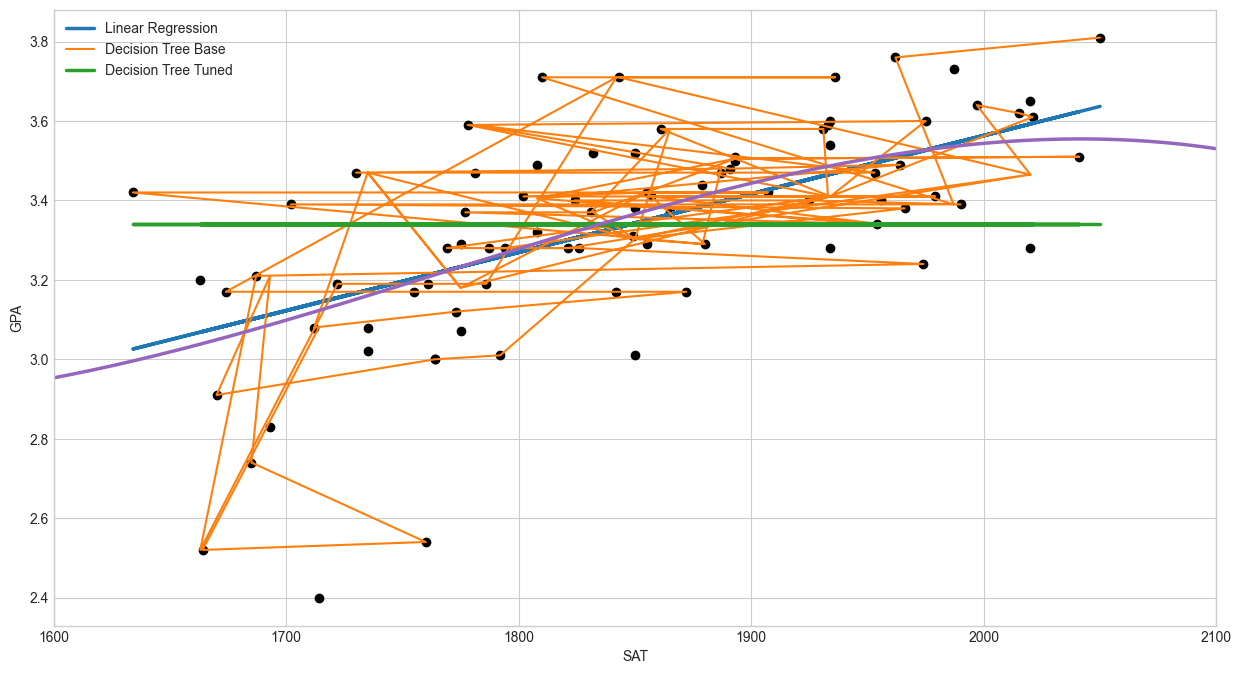

In [149]:
plt.figure(figsize=(15,8))
plt.scatter(
    x = df['SAT'],
    y = df['GPA'],
    color = 'black'
)
plt.plot(
    X,
    lr.predict(X),
    label = 'Linear Regression',
    linewidth = 2.5
)
plt.plot(
    X,
    dtr.predict(X),
    label = 'Decision Tree Base'
)
plt.plot(
    X,
    dtr1.predict(X),
    label = 'Decision Tree Tuned',
    linewidth = 2.5
)
plt.plot(
    X_new_poly,
    y_new_poly,
    linewidth = 2.5
)
plt.xlim(1600,2100)
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.legend()
plt.show()

In [153]:
poly_pipeline = Pipeline([
    ('poly',PolynomialFeatures(degree = 3)),
    ('linear_model_poly',LinearRegression())
])

In [ ]:
estimators_list = [
    ('poly_linear',poly_pipeline),
    ('linear',lr),
    # ('dtree_base',dtr),
    # ('dtee_tuned',dtr1)
    # If u add these the model performance will just decrease 
]

In [173]:
voting1 = VotingRegressor(
    estimators = estimators_list
)

In [174]:
voting1.fit(X_train,y_train)

,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingRegressor`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('poly_linear', ...), ('linear', ...)]"
,"weights weights: array-like of shape (n_regressors,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted values before averaging. Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",3
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",True
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06


In [175]:
y_pred_voting_reg = voting1.predict(X_test)

In [176]:
print(f'The r2_score of the model is : {r2_score(y_test,y_pred_voting_reg)}')
print(f'The rmse of the model is : {root_mean_squared_error(y_test,y_pred_voting_reg)}')
print(f'The mae of the model is : {mean_absolute_error(y_test,y_pred_voting_reg)}')

The r2_score of the model is : 0.4844352621535095
The rmse of the model is : 0.22584890385306988
The mae of the model is : 0.16069666654613282


In [177]:
cvs3 = cross_val_score(
    voting1,
    X,
    y,
    cv = 5
)
cvs3.mean(),cvs3.std()


(np.float64(-16.755568447391756), np.float64(10.050497941948796))

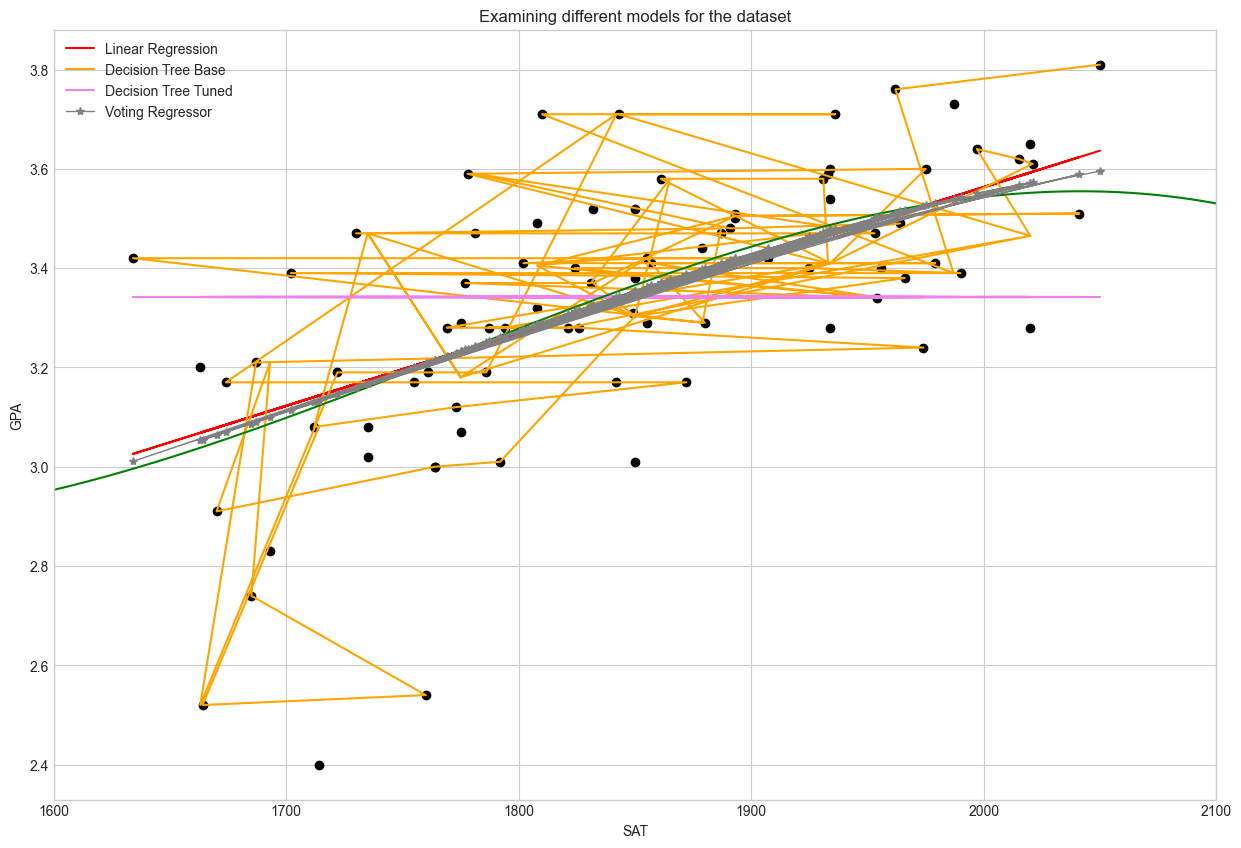

In [200]:
plt.figure(figsize=(15,10))
plt.scatter(
    x = df['SAT'],
    y = df['GPA'],
    color = 'black'
)
plt.plot(
    X,
    lr.predict(X),
    label = 'Linear Regression',
    linewidth = 1.5,
    color = 'red',
)
plt.plot(
    X,
    dtr.predict(X),
    label = 'Decision Tree Base',
    color = 'orange',
)
plt.plot(
    X,
    dtr1.predict(X),
    label = 'Decision Tree Tuned',
    linewidth = 1.5,
    color = 'violet',
)
plt.plot(
    X_new_poly,
    y_new_poly,
    linewidth = 1.5,
    color = 'green',
)
plt.plot(
    X,
    voting1.predict(X),
    linewidth = 1,
    label ='Voting Regressor',
    color = 'grey',
    marker = '*'
)
plt.title('Examining different models for the dataset')
plt.xlim(1600,2100)
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.legend()
plt.show()

In [ ]:
params = {
    'max_depth' : [1,2,5,10],
    'min_samples_split' : [2,3,5,10],
    'max_leaf_nodes' : [2,3,5,7],
    'ccp_alpha' : [ x*0.01 for x in range(1,11)],
    'min_samples_leaf' : [1,2,3,4,5]
}

In [415]:
rf1 = RandomForestRegressor(
    max_depth = 1,
    min_samples_split = 3,
    ccp_alpha = 0.0005,
    max_leaf_nodes = 5
)

In [416]:
rf1.fit(X_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",1
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",3
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",5
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at t

In [417]:
y_pred_rf = rf1.predict(X_test)

In [418]:
print(f'The r2_score of the model is : {r2_score(y_test,y_pred_rf)}')
print(f'The rmse of the model is : {root_mean_squared_error(y_test,y_pred_rf)}')
print(f'The mae of the model is : {mean_absolute_error(y_test,y_pred_rf)}')

The r2_score of the model is : 0.47144953034036485
The rmse of the model is : 0.22867548854486427
The mae of the model is : 0.16307496400788885


In [419]:
cvs3 = cross_val_score(
    voting1,
    X,
    y,
    cv = 5
)
cvs3.mean(),cvs3.std()


(np.float64(-16.755568447391756), np.float64(10.050497941948796))

In [556]:
boosting = AdaBoostRegressor(
    estimator = dtr1,
    n_estimators = 250
)

In [557]:
boosting.fit(X_train,y_train)

,"estimator estimator: object, default=NoneThe base estimator from which the boosted ensemble is built.If ``None``, then the base estimator is:class:`~sklearn.tree.DecisionTreeRegressor` initialized with`max_depth=3`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",DecisionTreeR..._leaf_nodes=2)
,"n_estimators n_estimators: int, default=50The maximum number of estimators at which boosting is terminated.In case of perfect fit, the learning procedure is stopped early.Values must be in the range `[1, inf)`.",250
,"learning_rate learning_rate: float, default=1.0Weight applied to each regressor at each boosting iteration. A higherlearning rate increases the contribution of each regressor. There isa trade-off between the `learning_rate` and `n_estimators` parameters.Values must be in the range `(0.0, inf)`.",1.0
,"loss loss: {'linear', 'square', 'exponential'}, default='linear'The loss function to use when updating the weights after eachboosting iteration.",'linear'
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random seed given at each `estimator` at eachboosting iteration.Thus, it is only used when `estimator` exposes a `random_state`.In addition, it controls the bootstrap of the weights used to train the`estimator` at each boosting iteration.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",1
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not prov

In [558]:
y_pred_boosting = boosting.predict(X_test)

In [559]:
print(f'The r2_score of the model is : {r2_score(y_test,y_pred_boosting)}')
print(f'The rmse of the model is : {root_mean_squared_error(y_test,y_pred_boosting)}')
print(f'The mae of the model is : {mean_absolute_error(y_test,y_pred_boosting)}')

The r2_score of the model is : 0.5402556626719339
The rmse of the model is : 0.2132723618136221
The mae of the model is : 0.151194205749282
